In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/heart_disease_selected.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

In [4]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

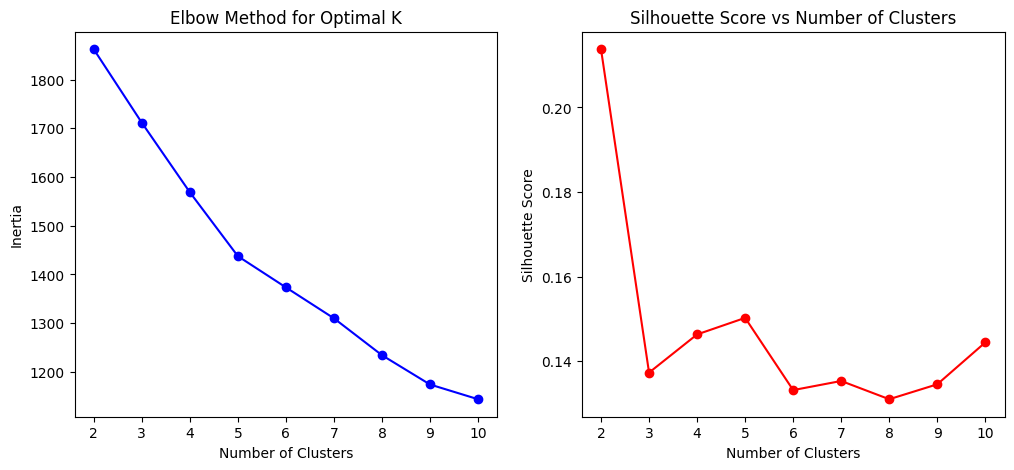

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [6]:
optimal_k = k_range[np.argmax(silhouette_scores)]
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X)

In [7]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(X)

In [8]:
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
hierarchical_ari = adjusted_rand_score(y, hierarchical_labels)

print(f"K-Means ARI with true labels: {kmeans_ari:.3f}")
print(f"Hierarchical ARI with true labels: {hierarchical_ari:.3f}")

K-Means ARI with true labels: 0.370
Hierarchical ARI with true labels: 0.355


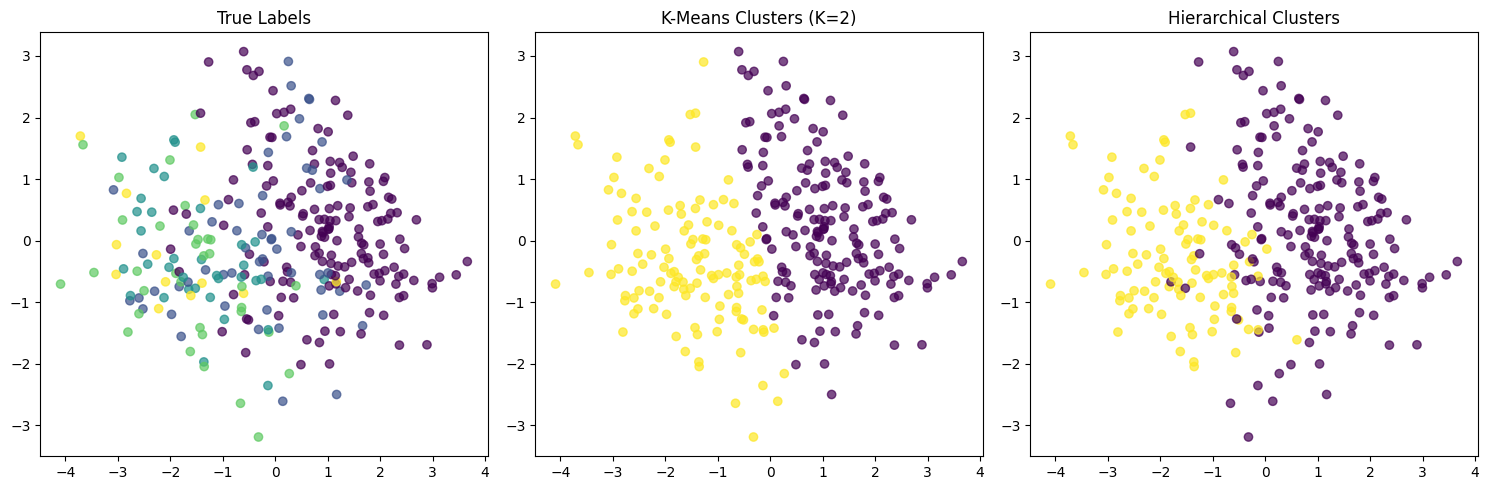

In [9]:
pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('True Labels')

plt.subplot(1, 3, 2)
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title(f'K-Means Clusters (K={optimal_k})')

plt.subplot(1, 3, 3)
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Clusters')

plt.tight_layout()
plt.show()
